In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [49]:
dataset = pd.read_csv('data/wine.csv')

In [50]:
dataset.head()

,Alcohol real,Malic_acid real,Ash real,Alcalinity_of_ash real,Magnesium real,Total_phenols real,Flavanoids real,Nonflavanoid_phenols real,Proanthocyanins real,Color_intensity real,Hue real,OD280/OD315_of_diluted_wines real,Proline real,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [51]:
X = dataset.drop(columns=['Class'])
scaler = StandardScaler().fit(X)
X = scaler.transform(X)   
y = dataset['Class']

In [52]:
def classifier_test(clf, X, y, prms=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    if not prms:
        score = np.mean(cross_val_score(clf, X_train, y_train, cv=10))
        print('Acurácia:', score)
        
    else:
        clf = GridSearchCV(clf, prms)
        clf.fit(X_train, y_train)

        print('Melhor acurácia cross validation:', clf.best_score_) 
        print('Melhor classificador:', clf.best_estimator_) 


        y_pred = clf.best_estimator_.predict(X_test)
        print('Acurácia train test split:', sum(y_pred == y_test)/len(y_pred))


        #df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
        sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d")

In [53]:
classifier_test(GaussianNB(), X, y)

Acurácia: 0.9666666666666666


Melhor acurácia cross validation: 0.9274193548387096
Melhor classificador: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Acurácia train test split: 0.9814814814814815


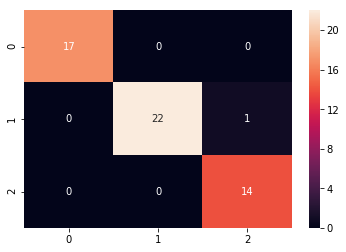

In [54]:
classifier_test(DecisionTreeClassifier(), X, y, {
    'max_depth': np.arange(1, 100)
})

Melhor acurácia cross validation: 0.9758064516129032
Melhor classificador: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='distance')
Acurácia train test split: 1.0


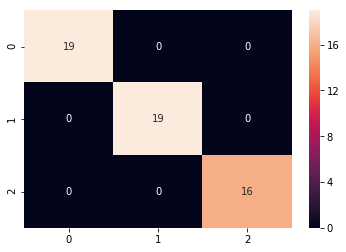

In [55]:
classifier_test(KNeighborsClassifier(), X, y, {
    'n_neighbors': np.arange(1, 50), 
    'weights': ['uniform', 'distance']
})

Melhor acurácia cross validation: 0.9919354838709677
Melhor classificador: MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=40, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Acurácia train test split: 0.9629629629629629


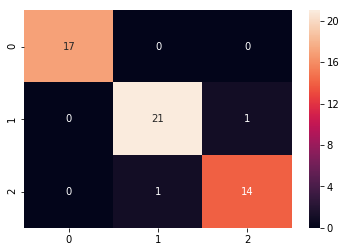

In [56]:
classifier_test(MLPClassifier(), X, y, {
    'hidden_layer_sizes': np.arange(5, 101, 5), 
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [1e-5, 0.001, 0.01]
})

Melhor acurácia cross validation: 0.967741935483871
Melhor classificador: SVC(C=0.27605521104220854, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Acurácia train test split: 1.0


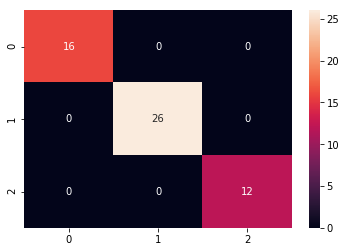

In [57]:
classifier_test(SVC(), X, y, [
    {'kernel': ['rbf'], 'C': np.linspace(1e-16, 20, 5000), 'gamma': [1e-2, 1e-3, 1e-4]},
    {'kernel': ['linear'], 'C': np.linspace(1e-16, 20, 5000)}
])

Melhor acurácia cross validation: 0.9758064516129032
Melhor classificador: BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=12, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
Acurácia train test split: 0.9629629629629629


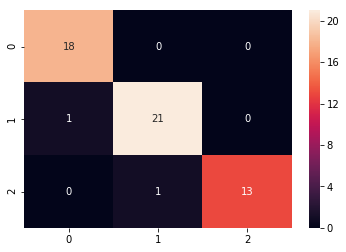

In [59]:
classifier_test(BaggingClassifier(), X, y, [
    {'base_estimator': [DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3), GaussianNB()],
     'n_estimators': np.arange(1, 100)}
])

Melhor acurácia cross validation: 0.9838709677419355
Melhor classificador: AdaBoostClassifier(algorithm='SAMME', base_estimator=GaussianNB(priors=None),
          learning_rate=0.9, n_estimators=5, random_state=None)
Acurácia train test split: 0.9814814814814815


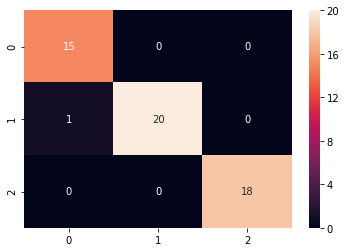

In [60]:
classifier_test(AdaBoostClassifier(), X, y, [
    {'base_estimator': [DecisionTreeClassifier(), GaussianNB()],
     'n_estimators': np.arange(1, 100),
     'learning_rate': np.arange(0.1, 1.01, 0.1),
     'algorithm': ['SAMME', 'SAMME.R']}
])

Melhor acurácia cross validation: 0.9838709677419355
Melhor classificador: BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.2,
         max_samples=1.0, n_estimators=44, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
Acurácia train test split: 0.9629629629629629


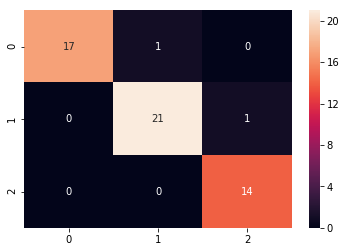

In [61]:
classifier_test(BaggingClassifier(), X, y, [
    {'base_estimator': [DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3), GaussianNB()],
     'n_estimators': np.arange(1, 100),
     'max_features': np.arange(0.1, 1.0, 0.1)}
])

In [62]:
classifier_test(RandomForestClassifier(), X, y, [
    {'n_estimators': np.arange(1, 100),
     'criterion': ['gini', 'entropy'],
     'max_depth': np.arange(1, 100)}
])

KeyboardInterrupt: 